<a href="https://colab.research.google.com/github/YopaNelly/AI-ML-Basics/blob/main/Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import torch
import matplotlib.pyplot as plt



In [4]:
df = pd.read_csv("house_prices_yaounde.csv")

In [5]:
df.head()

,bedrooms,bathrooms,parking,size_sqm,age,condition,year_built,renovation_year,location,floor_number,distance_to_city_center,proximity_to_schools,price
0,7.0,2.0,NaN,111.0,NaN,excellent,1985.0,1981.0,Bastos,3.0,4.714763,1.774572,30962.533609
1,4.0,3.0,0.0,271.0,40.0,good,1970.0,2011.0,Mvan,2.0,5.268401,3.664092,2733.858110
2,NaN,1.0,2.0,282.0,48.0,poor,2005.0,NaN,NaN,NaN,7.680354,2.696442,77878.500593
3,7.0,2.0,0.0,81.0,35.0,good,2018.0,NaN,Bastos,2.0,8.042010,NaN,44617.709958
4,3.0,NaN,0.0,68.0,28.0,fair,1975.0,NaN,Oyomabang,1.0,9.636422,NaN,45012.886096


In [6]:
df.isnull().sum()

,0
bedrooms,1000
bathrooms,1000
parking,1000
size_sqm,1000
age,1000
condition,1000
year_built,1000
renovation_year,7932
location,1000
floor_number,1000


In [7]:
df.shape

(10000, 13)

In [8]:
# remove all null values

df = df.dropna()
df.isnull().sum()
df.shape


(675, 13)

In [9]:
# create a new datafrme with only price and size_sqm

new_df = df[["price", "size_sqm"]]


In [10]:
new_df.head()

,price,size_sqm
1,2733.858110,271.0
7,74789.670708,99.0
8,67680.107226,249.0
9,10815.557454,33.0
30,24752.908496,131.0


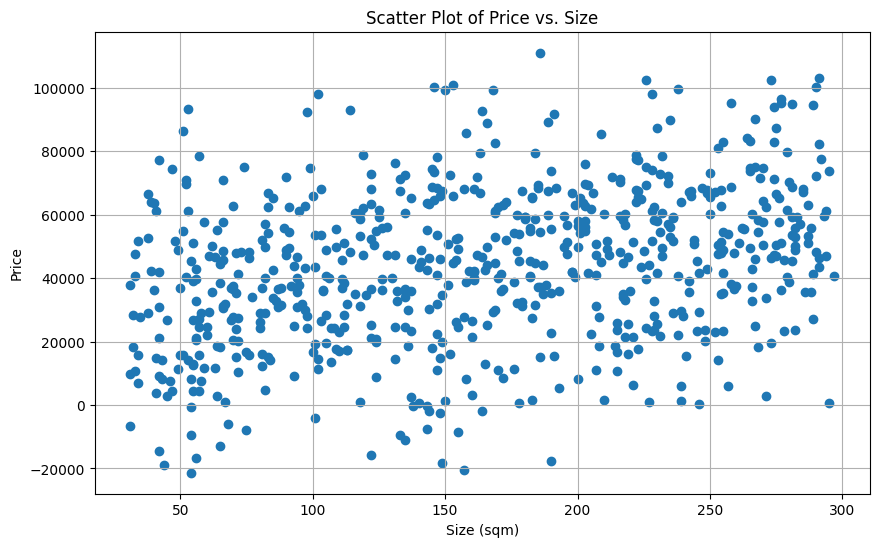

In [11]:
# create a scatter plot between the two features in new_df

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(new_df['size_sqm'], new_df['price'])
plt.xlabel('Size (sqm)')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Size')
plt.grid(True)
plt.show()


In [12]:

# Calculate the mean of 'price' and 'size_sqm'
mean_price = new_df['price'].mean()
mean_size_sqm = new_df['size_sqm'].mean()

print(f"Mean Price: {mean_price}")
print(f"Mean Size (sqm): {mean_size_sqm}")


Mean Price: 43598.05472635428
Mean Size (sqm): 163.5037037037037


Mean Price: 43598.05472635428
Mean Size (sqm): 163.5037037037037


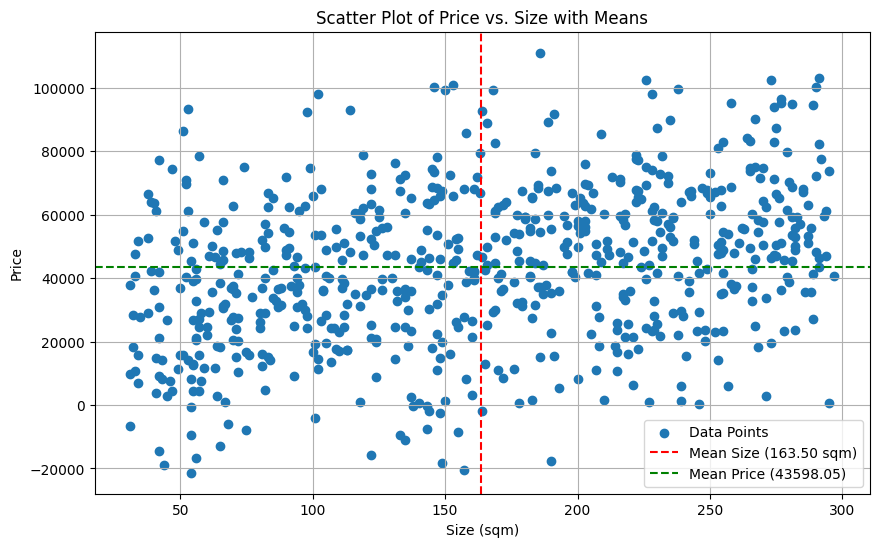

In [13]:
# Calculate the mean of 'price' and 'size_sqm'
mean_price = new_df['price'].mean()
mean_size_sqm = new_df['size_sqm'].mean()

print(f"Mean Price: {mean_price}")
print(f"Mean Size (sqm): {mean_size_sqm}")

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(new_df['size_sqm'], new_df['price'], label='Data Points')

# Add a vertical line for the mean size
plt.axvline(x=mean_size_sqm, color='red', linestyle='--', label=f'Mean Size ({mean_size_sqm:.2f} sqm)')

# Add a horizontal line for the mean price
plt.axhline(y=mean_price, color='green', linestyle='--', label=f'Mean Price ({mean_price:.2f})')


plt.xlabel('Size (sqm)')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Size with Means')
plt.grid(True)
plt.legend() # Show the legend
plt.show()


In [14]:
new_df["X-mean"] = new_df["size_sqm"] - new_df["size_sqm"].mean()
new_df["Y-mean"] = new_df["price"] - new_df["price"].mean()
new_df["X-mean^2"] = new_df["X-mean"] ** 2
new_df["Y-mean^2"] = new_df["Y-mean"] ** 2
new_df

<ipython-input-14-c519b9111e2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["X-mean"] = new_df["size_sqm"] - new_df["size_sqm"].mean()
<ipython-input-14-c519b9111e2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Y-mean"] = new_df["price"] - new_df["price"].mean()
<ipython-input-14-c519b9111e2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,price,size_sqm,X-mean,Y-mean,X-mean^2,Y-mean^2
1,2733.858110,271.0,107.496296,-40864.196617,11555.453717,1.669883e+09
7,74789.670708,99.0,-64.503704,31191.615982,4160.727791,9.729169e+08
8,67680.107226,249.0,85.496296,24082.052499,7309.616680,5.799453e+08
9,10815.557454,33.0,-130.503704,-32782.497273,17031.216680,1.074692e+09
30,24752.908496,131.0,-32.503704,-18845.146231,1056.490754,3.551395e+08
...,...,...,...,...,...,...
9925,58240.325595,229.0,65.496296,14642.270868,4289.764829,2.143961e+08
9935,30969.486866,42.0,-121.503704,-12628.567861,14763.150014,1.594807e+08
9938,29053.825386,236.0,72.496296,-14544.229341,5255.712977,2.115346e+08
9959,83296.572285,265.0,101.496296,39698.517559,10301.498162,1.575972e+09


In [15]:

# Calculate the covariance
Cov_XY = (new_df["X-mean"] * new_df["Y-mean"]).sum()

print(f"Covariance: {Cov_XY}")


Covariance: 414113500.32283175


In [16]:
std_X = ((new_df["X-mean^2"]).sum())**0.5
std_Y = ((new_df["Y-mean^2"]).sum())**0.5

print(f"Standard Deviation of X: {std_X}")
print(f"Standard Deviation of Y: {std_Y}")

Standard Deviation of X: 1976.4196772802939
Standard Deviation of Y: 635847.6519514116


In [17]:
corr_XY = Cov_XY / (std_X * std_Y)
print(f"Correlation Coefficient: {corr_XY}")

Correlation Coefficient: 0.3295240737900194
